In [30]:
%matplotlib inline 

import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils
import sys
sys.path.append('/media/recode/DATA2/Object_detector_test/')
from barcode_detector_gray import BarcodeDetector

[ 942  762 1268 1383]


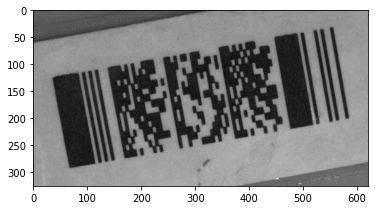

In [59]:
# INPUT_PATH = '/media/TrackDiagnostics/17-02-2021/19.00.00/19.52.49.032_9caa2942-712b-11eb-af87-4d7fc2377e80/InputStream/04.jpg'
INPUT_PATH = '/media/recode/DATA2/TVS/20_02_2021_2/14.00.00/20_02_2021_14.13.51.251_015/0002969.bmp'
input_image = cv2.imread(INPUT_PATH,0)
input_image = imutils.rotate_bound(input_image.copy(),-10)
BASE_PATH = '/media/recode/DATA2/TVS/barcode/src/models/pdf417/PDF417_frozen_inference_graph_Gray_v1.pb'
NUM_CLASSES = 1
bd = BarcodeDetector(model_path=BASE_PATH, image_type='GRAY')

boxes = bd.predict(input_image, score_threshold=0.8, overlapThresh = 0.4)
boxes = boxes[0]
print(boxes)
#scores = scores.ravel()
#indices = np.argwhere(scores > 0.5).ravel()
    
width, height = input_image.shape
#k = indices[0]
#print('k : ', k)
bbox = boxes

x1, y1, x2, y2 = list(map(int, bbox1))
crop_image = input_image[bbox[0]:bbox[2], bbox[1]:bbox[3]]
plt.imshow(crop_image, cmap='gray')

In [61]:

# new_image = imutils.rotate_bound(new_image.copy(),theta)
thresh = cv2.threshold(crop_image.copy(), 140, 255, cv2.THRESH_BINARY)[1]
_,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
c = max(contours, key = cv2.contourArea)
for c in contours:
    
    immask=cv2.drawContours(imgcpy,[c], 0, 255, -1)


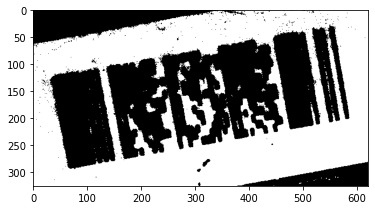

In [62]:
#Rotated image
plt.imshow(thresh, cmap='gray')

In [63]:
imgcpy = np.zeros(gray.shape).astype(gray.dtype)
immask=cv2.drawContours(imgcpy,[c], 0, 255, -1)
plt.imshow(immask, cmap='gray')

In [64]:
def overlay_corners(image, corners, radius, color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    corners = tuple(map(tuple, corners))
    for corner in corners:
        cv2.circle(overlaid_image, corner, radius, color, -1)
    return overlaid_image

In [65]:
def all_corners(var_gray_img, threshold=0.25):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 10)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners


In [69]:
var_all_corners = all_corners(crop_image,threshold=0.2)
debug_img = cv2.merge((crop_image, crop_image, crop_image))

pt1_thickness, pt1_color = 4, (255, 0, 0)
debug_img = overlay_corners(debug_img, var_all_corners, pt1_thickness, pt1_color)
plt.imshow(debug_img)